In [ ]:
import sys
import numpy as np
import pandas as pd
import xarray as xr

import warnings

warnings.filterwarnings("ignore")

import s2stools

In [3]:
# automatic code formatting
%load_ext lab_black

# recognize changes in imported files without restarting kernel
%load_ext autoreload
%autoreload 2

# add s2stools to python path
# paths = ["/project/meteo/work/Jonas.Spaeth/gitprojects/stos"]
# for p in paths:
#    sys.path.append(p)
# alternative:
# %pip install s2stools

# Open Files

In [4]:
# u60
print("u60...")
ds = s2stools.process.open_files(
    cf="_cf.nc",
    pf="_pf.nc",
    chc="_chc.nc",
    phc="_phc.nc",
    path_pattern="/project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*",
)
ds = ds.mean(["longitude", "latitude"]).rename(u="u60_10hpa")

u60...
realtime path:  /project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*_cf.nc
cf	 
pf	 
chc	 
phc	 


# Plot average ensemble standard deviation

In [5]:
u60_ensstd = ds.u60_10hpa.std("number")

dimensions:
```python
ds.u60_10hpa  # reftime, hc_year, number, leadtime
u60_ensstd  # reftime, hc_year, leadtime
u60_ensstd_stacked  # fc, leadtime
u60_ensstd_stacked.mean("fc")  # leadtime
```

In [6]:
u60_ensstd_stacked = s2stools.process.stack_ensfc(u60_ensstd)

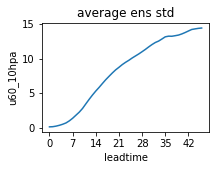

In [7]:
import s2stools.plot
import matplotlib.pyplot as plt

u60_ensstd_stacked.mean("fc").plot(size=2)

ax = plt.gca()
s2stools.plot.xaxis_unit_days(ax, multiple=7)
ax.set_title("average ens std")
plt.show()

# Events

In [8]:
ds_short = ds.isel(reftime=range(2), number=range(2))

In [9]:
# find ssw
event_list = s2stools.events.find_ssw(
    ds_short, buffer_start=0, buffer_end=0, require_westwind_start=1
)
event_list

number of:
	 all forecast combinations:  84
	 valid forecast combinations:  84
	 forecasts start start with 10 days westwind:  84


Scanning Forecasts for Events: 100%|██████████| 84/84 [00:12<00:00,  6.49it/s]


[{'fc': {'reftime': '2017-11-16', 'hc_year': -20, 'number': 0},
  'leadtime': 'P37DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -18, 'number': 1},
  'leadtime': 'P31DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -17, 'number': 0},
  'leadtime': 'P37DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -14, 'number': 0},
  'leadtime': 'P29DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -3, 'number': 1},
  'leadtime': 'P43DT0H0M0S'},
 {'fc': {'reftime': '2017-11-16', 'hc_year': -1, 'number': 0},
  'leadtime': 'P44DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -20, 'number': 0},
  'leadtime': 'P43DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -20, 'number': 1},
  'leadtime': 'P41DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -17, 'number': 1},
  'leadtime': 'P41DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -15, 'number': 1},
  'leadtime': 'P31DT0H0M0S'},
 {'fc': {'reftime': '2017-11-20', 'hc_year': -8, 'number': 0},

In [10]:
# create EventComposite
ec = s2stools.events.EventComposite(
    data=ds_short, event_jsons_path=event_list, descr="SSW", model="ecmwf"
)
ec

Opening Events: 100%|██████████| 14/14 [00:00<00:00, 430.94it/s]


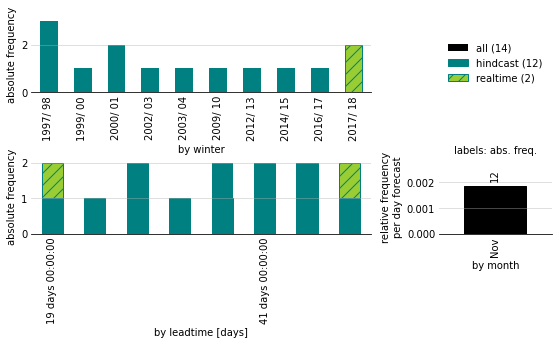

In [11]:
fig, ax = ec.plot_eventinfo()

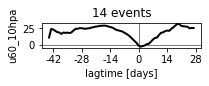

In [12]:
fig, ax = s2stools.plot.composite_overview(ec.comp)

In [13]:
ec.comp

<xarray.Dataset>
Dimensions:    (lagtime: 72, i: 14)
Coordinates:
  * lagtime    (lagtime) timedelta64[ns] -44 days -43 days ... 26 days 27 days
    number     (i) int64 0 1 0 0 1 0 0 1 1 1 0 0 0 1
    reftime    (i) datetime64[ns] 2017-11-16 2017-11-16 ... 2017-11-20
    hc_year    (i) int64 -20 -18 -17 -14 -3 -1 -20 -20 -17 -15 -8 -5 0 0
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    u60_10hpa  (i, lagtime) float32 dask.array<chunksize=(1, 72), meta=np.ndarray>